<a href="https://colab.research.google.com/github/Swathi014/22ITCS100-Advanced-Machine-Learning/blob/main/Multi_Variable_Linear_Regression_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Variable Linear Regression

# Step 1: Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

# Step 2: Load the Data

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MTECH/Dataset/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Step 3: Plot Data

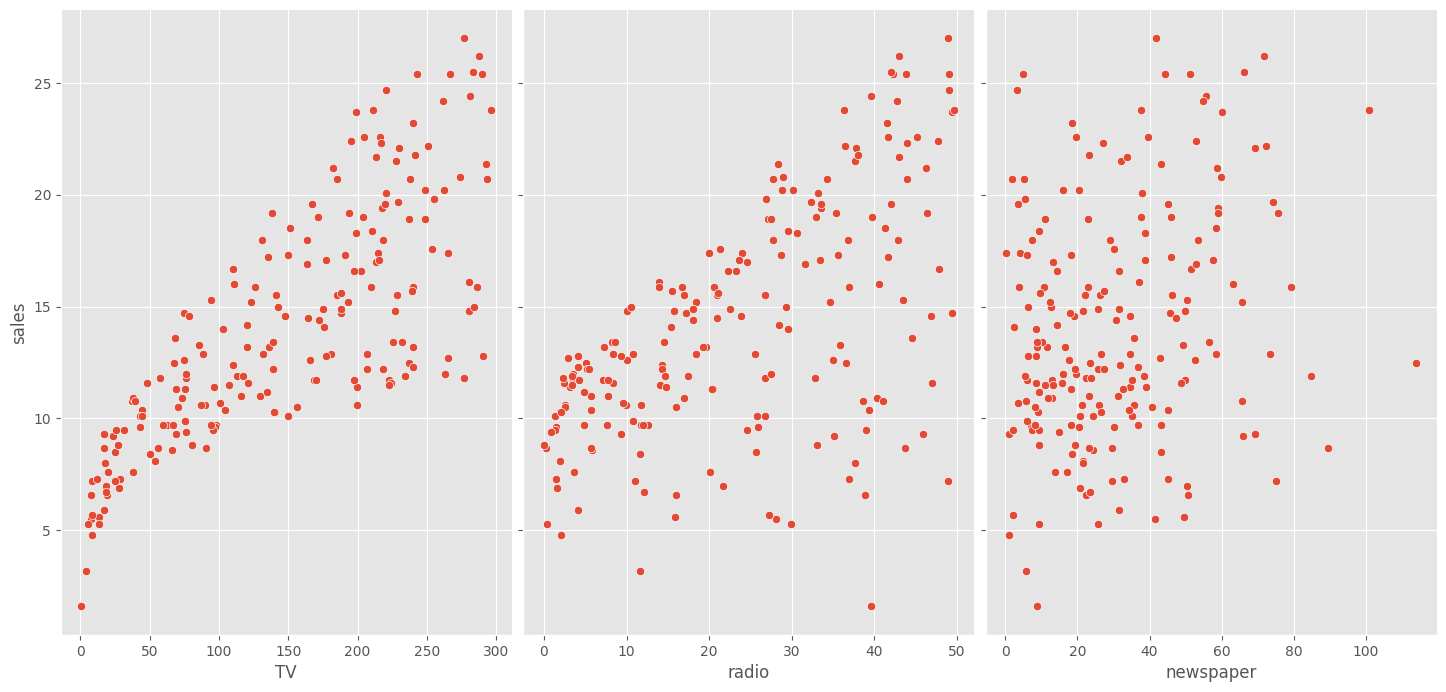

In [ ]:
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7)

# Step 4: Estimating Coefficients

In [ ]:
from sklearn.linear_model import LinearRegression

# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = df[feature_cols]
y = df.sales

# instantiate and fit
lr = LinearRegression()
lr.fit(X, y)

# print the coefficients
print(lr.intercept_)
print(lr.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [ ]:
# pair the feature names with the coefficients
list(zip(feature_cols, lr.coef_))

[('TV', np.float64(0.0457646454553976)),
 ('radio', np.float64(0.18853001691820448)),
 ('newspaper', np.float64(-0.0010374930424763285))]

<Axes: >

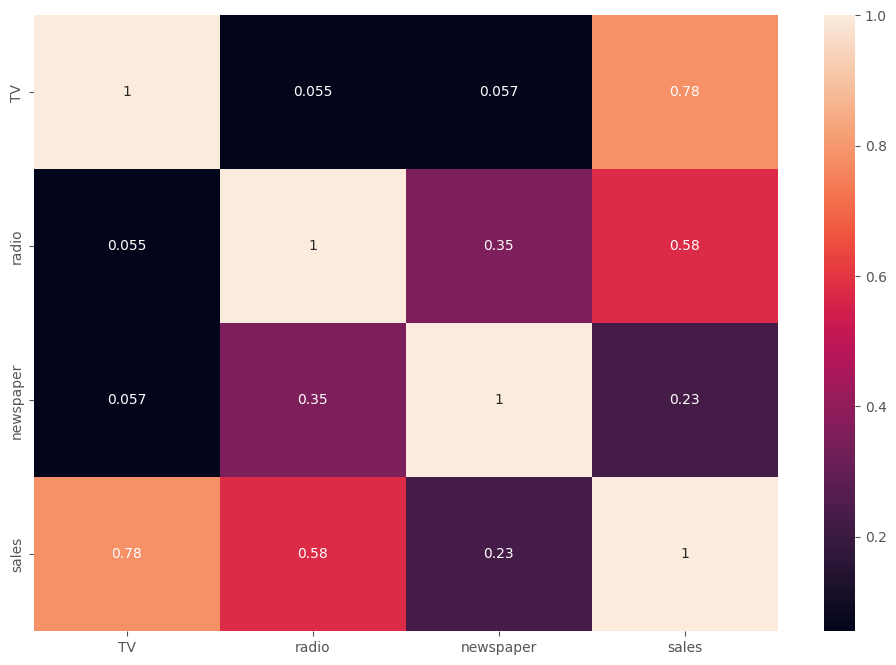

In [ ]:
sns.heatmap(df.corr(), annot=True)

# Step 5:  Prediction & Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(X[['TV', 'radio', 'newspaper']])
print(lr.score(X, y))
print(mean_squared_error(y, y_pred))

0.8972106381789522
2.784126314510936
